In [1]:
!pip install kmodes

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/marketing_cva_f.csv')

In [4]:
df

,Customer,State,CLV,Coverage,Income,loc_type,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,BU79786,Washington,2763.519279,Basic,56274,Suburban,69,32,5,384.811147,Two-Door Car,40.696695
1,AI49188,Nevada,12887.431650,Premium,48767,Suburban,108,18,38,566.472247,Two-Door Car,48.755298
2,HB64268,Washington,2813.692575,Basic,43836,Rural,73,12,44,138.130879,Four-Door Car,70.394474
3,OC83172,Oregon,8256.297800,Basic,62902,Rural,69,14,94,159.383042,Two-Door Car,53.460212
4,XZ87318,Oregon,5380.898636,Basic,55350,Suburban,67,0,13,321.600000,Four-Door Car,32.811507
...,...,...,...,...,...,...,...,...,...,...,...,...
6812,TF56202,California,5032.165498,Basic,66367,Suburban,64,6,48,307.200000,Two-Door Car,37.492591
6813,YM19146,California,4100.398533,Premium,47761,Suburban,104,16,58,541.282007,Four-Door Car,48.946675
6814,LA72316,California,23405.987980,Basic,71941,Urban,73,18,89,198.234764,Four-Door Car,65.310053
6815,PK87824,California,3096.511217,Extended,21604,Suburban,79,14,28,379.200000,Four-Door Car,48.002914


In [5]:
# Eliminamos características no interesantes

df = df.drop(['Customer','CLV','monthly_premium','Months_Since_Policy_Inception','months_last_claim'],axis=1)

In [6]:
df.head()

,State,Coverage,Income,loc_type,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,Washington,Basic,56274,Suburban,384.811147,Two-Door Car,40.696695
1,Nevada,Premium,48767,Suburban,566.472247,Two-Door Car,48.755298
2,Washington,Basic,43836,Rural,138.130879,Four-Door Car,70.394474
3,Oregon,Basic,62902,Rural,159.383042,Two-Door Car,53.460212
4,Oregon,Basic,55350,Suburban,321.600000,Four-Door Car,32.811507


In [7]:
df.shape # La dimensión debe ser (6817,7)

(6817, 7)

num_clusters: 1
num_clusters: 2
num_clusters: 3
num_clusters: 4
num_clusters: 5


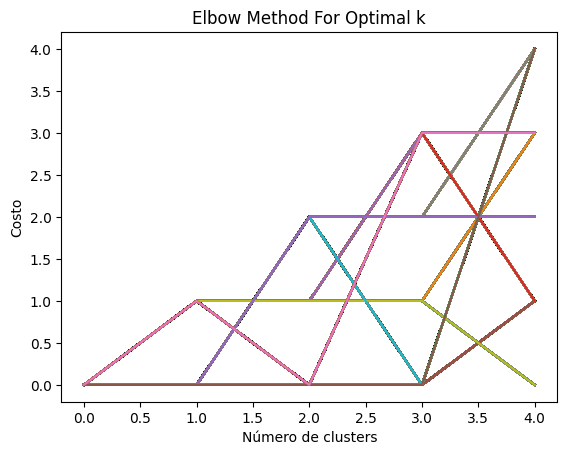

In [9]:
cost = []

for num_clusters in list(range(1, 6)):
    print(f"num_clusters: {num_clusters}")
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    cost.append(kproto.fit_predict(df, categorical=[0, 1, 2, 3, 5, 6]))  # Indicamos las columnas categóricas

plt.plot(cost)
plt.xlabel('Número de clusters')
plt.ylabel('Costo')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
# Entrenar con el número de clusters optimo
optimal_clusters = 3
kproto = KPrototypes(n_clusters=optimal_clusters, init='Cao')
clusters = kproto.fit_predict(df, categorical=[0, 1, 2, 3, 5, 6])

In [11]:
# Plotear los centroides


print(kproto.cluster_centroids_)

[['140.42857579744032' 'California' 'Basic' '95697' 'Rural'
  'Four-Door Car' '13.65700265']
 ['430.6593503566058' 'California' 'Basic' '25370' 'Suburban'
  'Four-Door Car' '11.87597393']
 ['966.873413677485' 'California' 'Basic' '13037' 'Suburban' 'SUV'
  '12.97579736']]


In [12]:
# Concatenar el cluster al dataframe
df['Cluster'] = clusters

In [13]:
df.head()

,State,Coverage,Income,loc_type,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age,Cluster
0,Washington,Basic,56274,Suburban,384.811147,Two-Door Car,40.696695,1
1,Nevada,Premium,48767,Suburban,566.472247,Two-Door Car,48.755298,1
2,Washington,Basic,43836,Rural,138.130879,Four-Door Car,70.394474,0
3,Oregon,Basic,62902,Rural,159.383042,Two-Door Car,53.460212,0
4,Oregon,Basic,55350,Suburban,321.600000,Four-Door Car,32.811507,1


## Análisis

In [14]:
# Head 10 del cluster 0
df[df['Cluster'] == 0].head(10)

,State,Coverage,Income,loc_type,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age,Cluster
2,Washington,Basic,43836,Rural,138.130879,Four-Door Car,70.394474,0
3,Oregon,Basic,62902,Rural,159.383042,Two-Door Car,53.460212,0
10,Oregon,Basic,24599,Rural,42.920271,Four-Door Car,67.515045,0
26,Oregon,Basic,37260,Rural,15.437681,Four-Door Car,64.455887,0
27,Arizona,Basic,68987,Urban,204.475147,Four-Door Car,56.853701,0
30,Arizona,Basic,53243,Rural,157.397849,Four-Door Car,35.894452,0
31,Oregon,Basic,50071,Rural,18.918935,Two-Door Car,46.781901,0
35,Oregon,Premium,10105,Rural,0.517753,SUV,54.341696,0
39,Nevada,Basic,36014,Rural,173.956072,Four-Door Car,55.667908,0
48,California,Basic,66525,Rural,104.331355,SUV,67.808555,0


In [15]:
# Head 10 del cluster 1
df[df['Cluster'] == 1].head(10)

,State,Coverage,Income,loc_type,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age,Cluster
0,Washington,Basic,56274,Suburban,384.811147,Two-Door Car,40.696695,1
1,Nevada,Premium,48767,Suburban,566.472247,Two-Door Car,48.755298,1
4,Oregon,Basic,55350,Suburban,321.600000,Four-Door Car,32.811507,1
5,Oregon,Basic,14072,Suburban,511.200000,Four-Door Car,68.528666,1
6,Oregon,Extended,28812,Urban,425.527834,Four-Door Car,54.426637,1
7,California,Premium,77026,Urban,472.029737,Four-Door Car,42.912717,1
8,Arizona,Basic,99845,Suburban,528.000000,SUV,58.986364,1
9,California,Basic,83689,Urban,307.139132,Four-Door Car,35.166331,1
11,Nevada,Basic,25049,Suburban,454.245098,Two-Door Car,52.954232,1
12,California,Basic,28855,Suburban,647.442031,SUV,51.894491,1


In [16]:
# Head 10 del cluster 2
df[df['Cluster'] == 2].head(10)

,State,Coverage,Income,loc_type,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age,Cluster
32,California,Extended,60021,Suburban,882.871945,Four-Door Car,56.434842,2
41,California,Premium,16701,Suburban,831.625979,Four-Door Car,48.094233,2
44,Oregon,Extended,16969,Suburban,704.768111,SUV,52.145980,2
62,California,Basic,51066,Suburban,787.993313,Four-Door Car,37.942811,2
88,Arizona,Basic,27804,Suburban,784.800000,SUV,48.721537,2
97,California,Basic,28262,Suburban,921.600000,Luxury SUV,70.368549,2
106,Arizona,Premium,69833,Suburban,828.662719,Four-Door Car,45.726594,2
111,Washington,Premium,63221,Suburban,806.400000,SUV,47.130067,2
123,Arizona,Basic,28142,Suburban,701.708239,Sports Car,41.810082,2
132,California,Basic,51066,Suburban,787.993313,Four-Door Car,45.525801,2


In [17]:
# Obtener un dataframe por cada cluster

df0 = df[df['Cluster'] == 0]
df1 = df[df['Cluster'] == 1]
df2 = df[df['Cluster'] == 2]

In [18]:
df0.describe()

,Income,Total_Claim_Amount,avg_vehicle_age,Cluster
count,2266.000000,2266.000000,2266.000000,2266.0
mean,59603.492498,140.428576,50.241535,0.0
std,22446.988326,82.062414,9.983140,0.0
min,10074.000000,0.099007,13.657003,0.0
25%,40730.250000,69.431232,43.529610,0.0
50%,61549.000000,135.300869,50.241631,0.0
75%,77595.000000,209.417385,56.938859,0.0
max,99981.000000,285.418473,83.387485,0.0


In [19]:
df1.describe()

,Income,Total_Claim_Amount,avg_vehicle_age,Cluster
count,3996.000000,3996.000000,3996.000000,3996.0
mean,46378.607608,430.659350,50.034394,1.0
std,24137.031733,107.629799,9.949801,0.0
min,10037.000000,285.745227,11.875974,1.0
25%,25805.750000,334.441785,43.304984,1.0
50%,40742.500000,412.800000,49.972636,1.0
75%,64576.250000,513.600000,56.837372,1.0
max,99961.000000,698.400000,80.135475,1.0


In [20]:
df2.describe()

,Income,Total_Claim_Amount,avg_vehicle_age,Cluster
count,555.000000,555.000000,555.000000,555.0
mean,42472.214414,966.873414,50.317005,2.0
std,21936.905938,275.703923,9.441665,0.0
min,10384.000000,699.167900,12.975797,2.0
25%,23807.000000,775.120492,43.945826,2.0
50%,39007.000000,888.000000,50.575375,2.0
75%,56752.000000,1067.312167,56.726136,2.0
max,99316.000000,2893.239678,76.941177,2.0


In [21]:
# Nos centramos en las variables State, loc_type, Coverage, Vehicle_Clss

# Describir df0, df1 y df2 con estas características

df0

,State,Coverage,Income,loc_type,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age,Cluster
2,Washington,Basic,43836,Rural,138.130879,Four-Door Car,70.394474,0
3,Oregon,Basic,62902,Rural,159.383042,Two-Door Car,53.460212,0
10,Oregon,Basic,24599,Rural,42.920271,Four-Door Car,67.515045,0
26,Oregon,Basic,37260,Rural,15.437681,Four-Door Car,64.455887,0
27,Arizona,Basic,68987,Urban,204.475147,Four-Door Car,56.853701,0
...,...,...,...,...,...,...,...,...
6799,California,Basic,57023,Urban,250.652309,Four-Door Car,60.607719,0
6803,California,Extended,44019,Rural,165.478147,SUV,44.344375,0
6804,California,Extended,59367,Rural,6.880385,Four-Door Car,55.456201,0
6807,California,Basic,51205,Urban,185.530076,Two-Door Car,52.604133,0


In [22]:
df1

,State,Coverage,Income,loc_type,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age,Cluster
0,Washington,Basic,56274,Suburban,384.811147,Two-Door Car,40.696695,1
1,Nevada,Premium,48767,Suburban,566.472247,Two-Door Car,48.755298,1
4,Oregon,Basic,55350,Suburban,321.600000,Four-Door Car,32.811507,1
5,Oregon,Basic,14072,Suburban,511.200000,Four-Door Car,68.528666,1
6,Oregon,Extended,28812,Urban,425.527834,Four-Door Car,54.426637,1
...,...,...,...,...,...,...,...,...
6811,California,Extended,60646,Suburban,643.200000,SUV,53.388158,1
6812,California,Basic,66367,Suburban,307.200000,Two-Door Car,37.492591,1
6813,California,Premium,47761,Suburban,541.282007,Four-Door Car,48.946675,1
6815,California,Extended,21604,Suburban,379.200000,Four-Door Car,48.002914,1


In [23]:
df2

,State,Coverage,Income,loc_type,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age,Cluster
32,California,Extended,60021,Suburban,882.871945,Four-Door Car,56.434842,2
41,California,Premium,16701,Suburban,831.625979,Four-Door Car,48.094233,2
44,Oregon,Extended,16969,Suburban,704.768111,SUV,52.145980,2
62,California,Basic,51066,Suburban,787.993313,Four-Door Car,37.942811,2
88,Arizona,Basic,27804,Suburban,784.800000,SUV,48.721537,2
...,...,...,...,...,...,...,...,...
6740,California,Premium,24054,Suburban,1133.801271,SUV,35.976496,2
6744,California,Extended,65620,Urban,766.322388,Luxury Car,43.523419,2
6751,California,Extended,33681,Suburban,873.127345,SUV,49.859308,2
6762,California,Premium,89546,Suburban,2452.894264,Luxury SUV,48.890566,2


# Ahora vamos a ver donde está la diferencia entre clusters analizando las categóricas

## Cluster 0

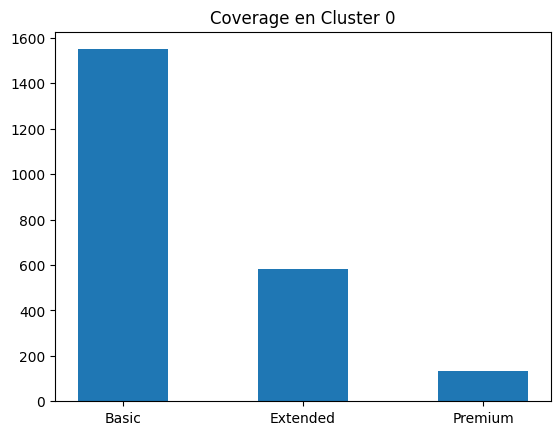

In [24]:
# Descripción de Coverage
categories = df0['Coverage'].value_counts().index
counts = df0['Coverage'].value_counts().values
plt.bar(categories, counts, width=0.5)
plt.title('Coverage en Cluster 0')
plt.show()

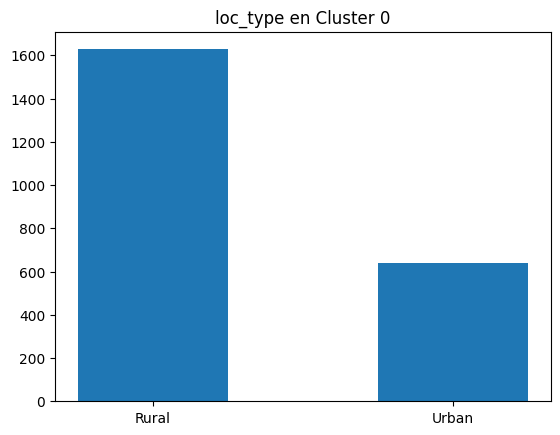

In [25]:
# Descripción de loc_type
categories = df0['loc_type'].value_counts().index
counts = df0['loc_type'].value_counts().values
plt.bar(categories, counts, width=0.5)
plt.title('loc_type en Cluster 0')
plt.show()

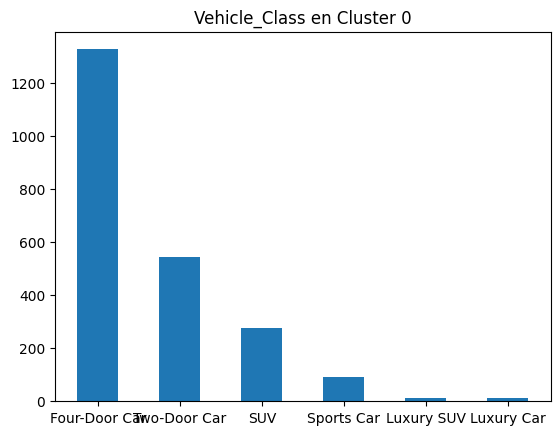

In [26]:
# Descripción de Vehicle_Class
categories = df0['Vehicle_Class'].value_counts().index
counts = df0['Vehicle_Class'].value_counts().values
plt.bar(categories, counts, width=0.5)
plt.title('Vehicle_Class en Cluster 0')
plt.show()

## Cluster 1

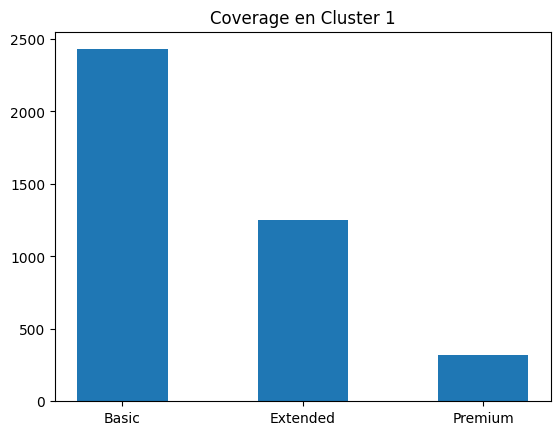

In [27]:
# Descripción de Coverage
categories = df1['Coverage'].value_counts().index
counts = df1['Coverage'].value_counts().values
plt.bar(categories, counts, width=0.5)
plt.title('Coverage en Cluster 1')
plt.show()

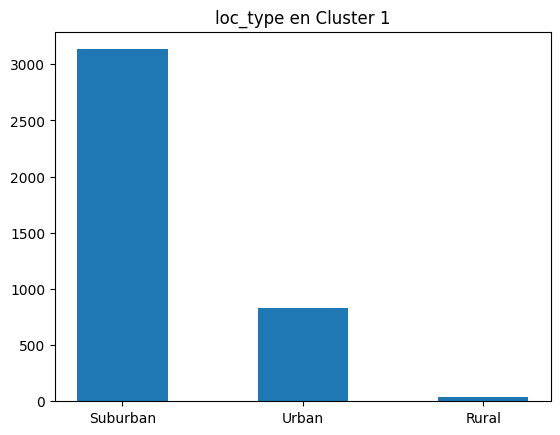

In [28]:
# Descripción de loc_type
categories = df1['loc_type'].value_counts().index
counts = df1['loc_type'].value_counts().values
plt.bar(categories, counts, width=0.5)
plt.title('loc_type en Cluster 1')
plt.show()

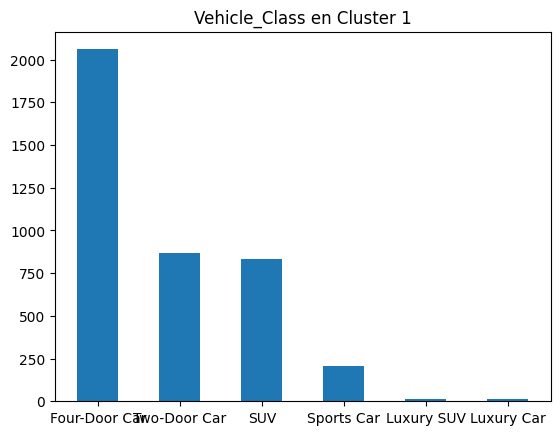

In [29]:
# Descripción de Vehicle_Class
categories = df1['Vehicle_Class'].value_counts().index
counts = df1['Vehicle_Class'].value_counts().values
plt.bar(categories, counts, width=0.5)
plt.title('Vehicle_Class en Cluster 1')
plt.show()


## Cluster 2

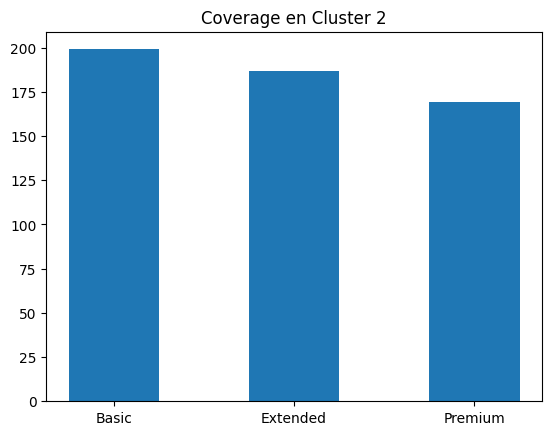

In [30]:
# Descripción de Coverage
categories = df2['Coverage'].value_counts().index
counts = df2['Coverage'].value_counts().values
plt.bar(categories, counts, width=0.5)
plt.title('Coverage en Cluster 2')
plt.show()

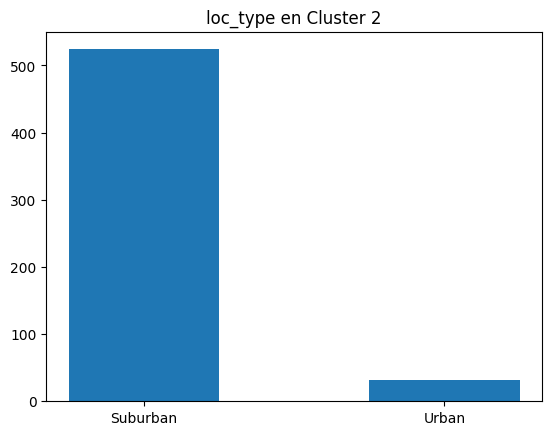

In [31]:
# Descripción de loc_type
categories = df2['loc_type'].value_counts().index
counts = df2['loc_type'].value_counts().values
plt.bar(categories, counts, width=0.5)
plt.title('loc_type en Cluster 2')
plt.show()

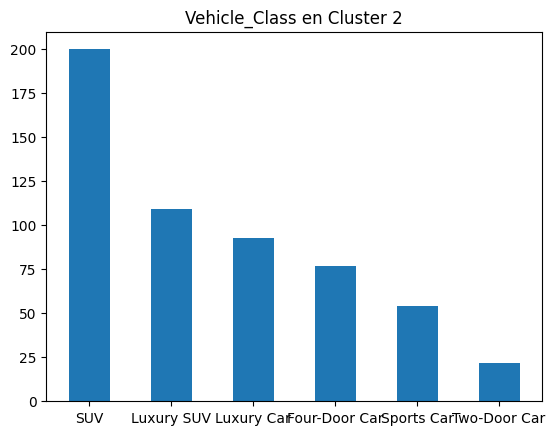

In [32]:
# Descripción de Vehicle_Class
categories = df2['Vehicle_Class'].value_counts().index
counts = df2['Vehicle_Class'].value_counts().values
plt.bar(categories, counts, width=0.5)
plt.title('Vehicle_Class en Cluster 2')
plt.show()

# Plotear 3D

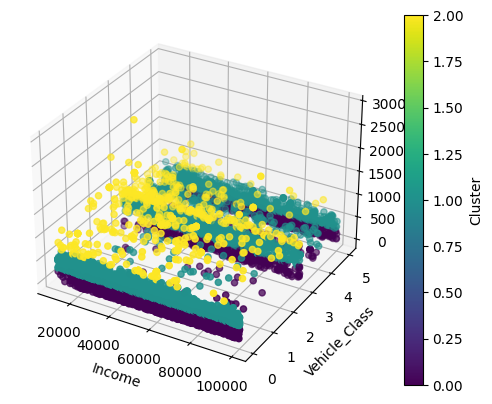

In [37]:
from mpl_toolkits.mplot3d import Axes3D

# Convert categorical data to numerical for plotting
df['Vehicle_Class_num'] = df['Vehicle_Class'].astype('category').cat.codes

# x, y, z axes
x = df['Income']
y = df['Vehicle_Class_num']
z = df['Total_Claim_Amount']

# 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=df['Cluster'], cmap='viridis')

ax.set_xlabel('Income')
ax.set_ylabel('Vehicle_Class')
ax.set_zlabel('Total_Claim_Amount')
plt.colorbar(scatter, label='Cluster')
plt.show()

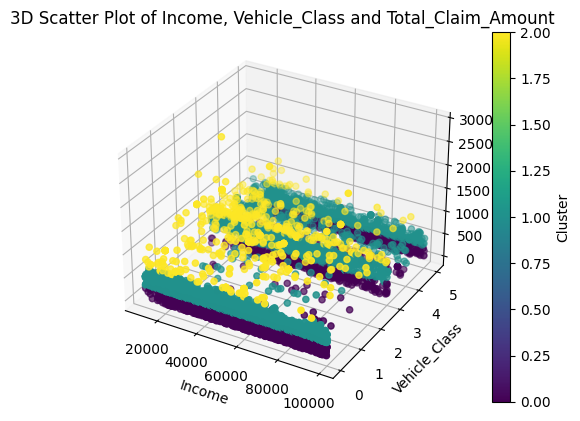

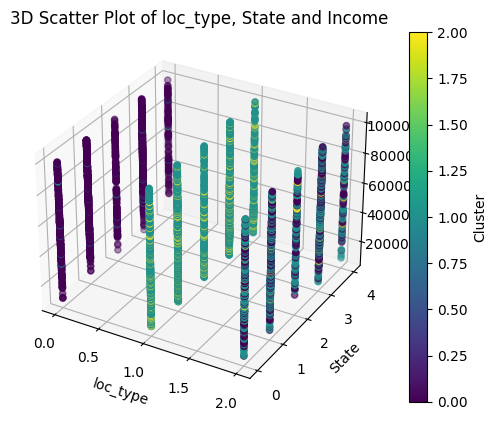

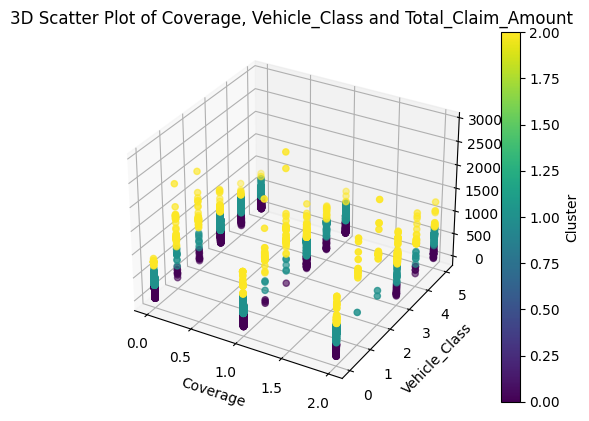

In [38]:
# Probar otras representaciones 3D
from mpl_toolkits.mplot3d import Axes3D

# Convert categorical data to numerical for plotting
df['State_num'] = df['State'].astype('category').cat.codes
df['Coverage_num'] = df['Coverage'].astype('category').cat.codes
df['loc_type_num'] = df['loc_type'].astype('category').cat.codes
df['Vehicle_Class_num'] = df['Vehicle_Class'].astype('category').cat.codes

# x, y, z axes
x = df['Income']
y = df['Vehicle_Class_num']
z = df['Total_Claim_Amount']

# 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=df['Cluster'], cmap='viridis')

ax.set_xlabel('Income')
ax.set_ylabel('Vehicle_Class')
ax.set_zlabel('Total_Claim_Amount')
plt.colorbar(scatter, label='Cluster')
plt.title('3D Scatter Plot of Income, Vehicle_Class and Total_Claim_Amount')
plt.show()

# Cambiar ejes para diferentes perspectivas
x = df['loc_type_num']
y = df['State_num']
z = df['Income']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=df['Cluster'], cmap='viridis')

ax.set_xlabel('loc_type')
ax.set_ylabel('State')
ax.set_zlabel('Income')
plt.colorbar(scatter, label='Cluster')
plt.title('3D Scatter Plot of loc_type, State and Income')
plt.show()

# Cambiar ejes para diferentes perspectivas
x = df['Coverage_num']
y = df['Vehicle_Class_num']
z = df['Total_Claim_Amount']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=df['Cluster'], cmap='viridis')

ax.set_xlabel('Coverage')
ax.set_ylabel('Vehicle_Class')
ax.set_zlabel('Total_Claim_Amount')
plt.colorbar(scatter, label='Cluster')
plt.title('3D Scatter Plot of Coverage, Vehicle_Class and Total_Claim_Amount')
plt.show()

num_clusters: 1
num_clusters: 2
num_clusters: 3
num_clusters: 4
num_clusters: 5


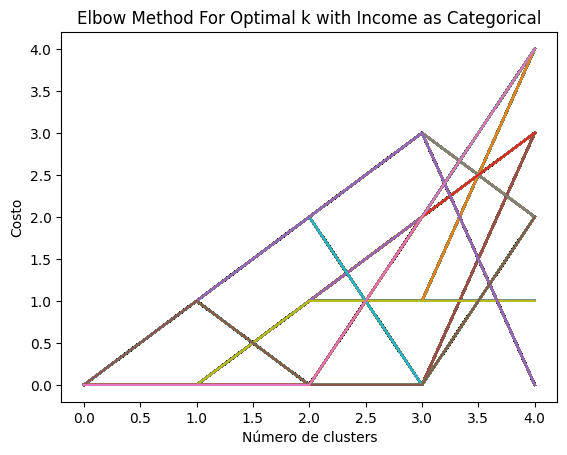

[['140.42857579744046' '1.7484554280670785' '1.7506619593998234'
  '0.37422771403353927' '0.5631067961165048' '3.227272727272727'
  'California' 'Basic' '95697' 'Rural' 'Four-Door Car' '13.65700265' '0']
 ['430.6593503566086' '1.926926926926927' '1.733983983983984'
  '0.47147147147147145' '1.1974474474474475' '2.498998998998999'
  'California' 'Basic' '25370' 'Suburban' 'Four-Door Car' '11.87597393'
  '1']
 ['966.8734136774837' '2.2288288288288287' '1.7567567567567568'
  '0.9459459459459459' '1.055855855855856' '2.3063063063063063'
  'California' 'Basic' '13037' 'Suburban' 'SUV' '12.97579736' '2']]


,Income,Total_Claim_Amount,avg_vehicle_age,Cluster,Vehicle_Class_num,State_num,Coverage_num,loc_type_num,Cluster_Cat
count,555.000000,555.000000,555.000000,555.0,555.000000,555.000000,555.000000,555.000000,555.0
mean,42472.214414,966.873414,50.317005,2.0,2.228829,1.756757,0.945946,1.055856,2.0
std,21936.905938,275.703923,9.441665,0.0,1.334044,1.301320,0.813224,0.229850,0.0
min,10384.000000,699.167900,12.975797,2.0,0.000000,0.000000,0.000000,1.000000,2.0
25%,23807.000000,775.120492,43.945826,2.0,1.000000,1.000000,0.000000,1.000000,2.0
50%,39007.000000,888.000000,50.575375,2.0,2.000000,1.000000,1.000000,1.000000,2.0
75%,56752.000000,1067.312167,56.726136,2.0,3.000000,3.000000,2.000000,1.000000,2.0
max,99316.000000,2893.239678,76.941177,2.0,5.000000,4.000000,2.000000,2.000000,2.0


In [39]:
# Repetimos el proceso tratando income como una categorical, ¿mejor clustering?
df['Income_cat'] = pd.cut(df['Income'], bins=5, labels=[1, 2, 3, 4, 5])

cost_cat = []

for num_clusters in list(range(1, 6)):
    print(f"num_clusters: {num_clusters}")
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    cost_cat.append(kproto.fit_predict(df, categorical=[0, 1, 2, 3, 5, 6, 7]))  # Incluimos la nueva columna categórica 'Income_cat'

plt.plot(cost_cat)
plt.xlabel('Número de clusters')
plt.ylabel('Costo')
plt.title('Elbow Method For Optimal k with Income as Categorical')
plt.show()

# Entrenar con el número de clusters óptimo nuevamente
optimal_clusters_cat = 3
kproto = KPrototypes(n_clusters=optimal_clusters_cat, init='Cao')
clusters_cat = kproto.fit_predict(df, categorical=[0, 1, 2, 3, 5, 6, 7])

# Asignar los clusters al DataFrame
df['Cluster_Cat'] = clusters_cat

# Visualizar nuevamente los centroides
print(kproto.cluster_centroids_)

# Análisis de los nuevos clusters con 'Income' como categórica
df0_cat = df[df['Cluster_Cat'] == 0]
df1_cat = df[df['Cluster_Cat'] == 1]
df2_cat = df[df['Cluster_Cat'] == 2]

df0_cat.describe()
df1_cat.describe()
df2_cat.describe()